In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn import metrics
import warnings
import sys
import seaborn as sns

In [5]:
# Loading datasets
customers  = pd.read_csv('Dataset\\Customers.csv')
products  = pd.read_csv('Dataset\\Products.csv')
transactions  = pd.read_csv('Dataset\\Transactions.csv')

In [6]:
final_dataset = pd.merge(transactions, customers, on="CustomerID", how="inner")


In [7]:
final_dataset.info()
final_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [8]:
final_dataset.columns.array

<NumpyExtensionArray>
[  'TransactionID',      'CustomerID',       'ProductID', 'TransactionDate',
        'Quantity',      'TotalValue',           'Price',    'CustomerName',
          'Region',      'SignupDate']
Length: 10, dtype: object

In [9]:
# Grouping transaction data

customer_features = final_dataset.groupby('CustomerID').agg({
    'TotalValue': 'sum',      
    'TransactionID': 'count', 
    'Quantity': 'sum',
}).rename(columns={
    'TotalValue': 'TotalRevenue',
    'TransactionID': 'NumTransactions',
    'Quantity': 'TotalQuantity'
}).reset_index()

In [10]:
# customer profile info
customer_data = pd.merge(customer_features, customers, on="CustomerID", how="inner")

In [11]:
# One hot encoder for 'region section'

encoder = OneHotEncoder()
region_encoded = encoder.fit_transform(customer_data[['Region']]).toarray()
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['Region']))


In [12]:
# Handling numerical feature and scaling
numfeatures = customer_data[['TotalRevenue', 'NumTransactions', 'TotalQuantity']]
data_for_clustering = pd.concat([numfeatures, region_df], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [13]:
dbi_values = []
silhouette_scores = []
cluster_counts = range(2, 11)

In [14]:
# 1. loop over cluster(each number of clusters) cluster_counts
# 2. fit kmeans
# 3. Calculate the Davies-Bouldin Index (DBI) and Silhouette Score
# 4. 
for k in cluster_counts:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    dbi = davies_bouldin_score(scaled_data, cluster_labels)
    dbi_values.append(dbi)
    
    silhouette = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette)

c:\Users\Atulya\Documents\Assignment1\assignment\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Atulya\Documents\Assignment1\assignment\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Atulya\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Atulya\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\U

In [15]:
# print("Cluster Counts:", cluster_counts)
print("Davies-Bouldin Index Values:", dbi_values)

Davies-Bouldin Index Values: [np.float64(1.6354076418937105), np.float64(1.3639759488573748), np.float64(1.1529548592400125), np.float64(0.8747963240718415), np.float64(0.8468067580072992), np.float64(0.8022603908456253), np.float64(0.663543033544625), np.float64(0.6664466892774863), np.float64(0.677714799204272)]


Text(0, 0.5, 'DB-Index')

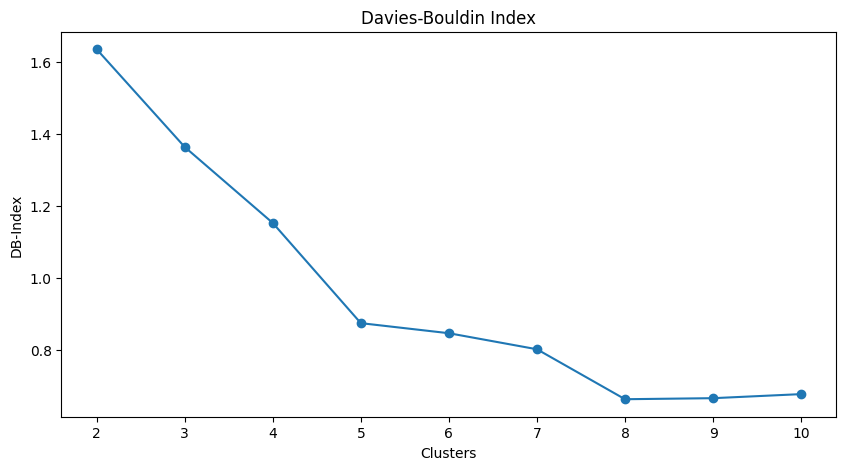

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(cluster_counts, dbi_values, marker='o', label='DB Index')
plt.title('Davies-Bouldin Index')
plt.xlabel('Clusters')
plt.ylabel('DB-Index')


Text(0, 0.5, 'Silhouette Score')

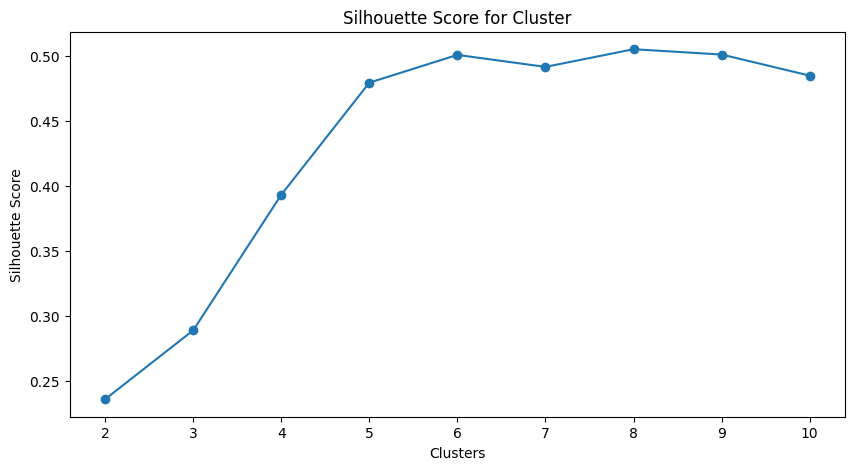

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(cluster_counts, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score for Cluster')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')

In [18]:
k = cluster_counts[np.argmin(dbi_values)]
print(f" Number of Clusters: {k}")

 Number of Clusters: 8


In [19]:
km = KMeans(n_clusters=k, random_state=42)
final_labels = kmeans.fit_predict(scaled_data)

In [20]:
# Dimensionality reduction for visuals
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

Text(0, 0.5, 'PCA Component 2')

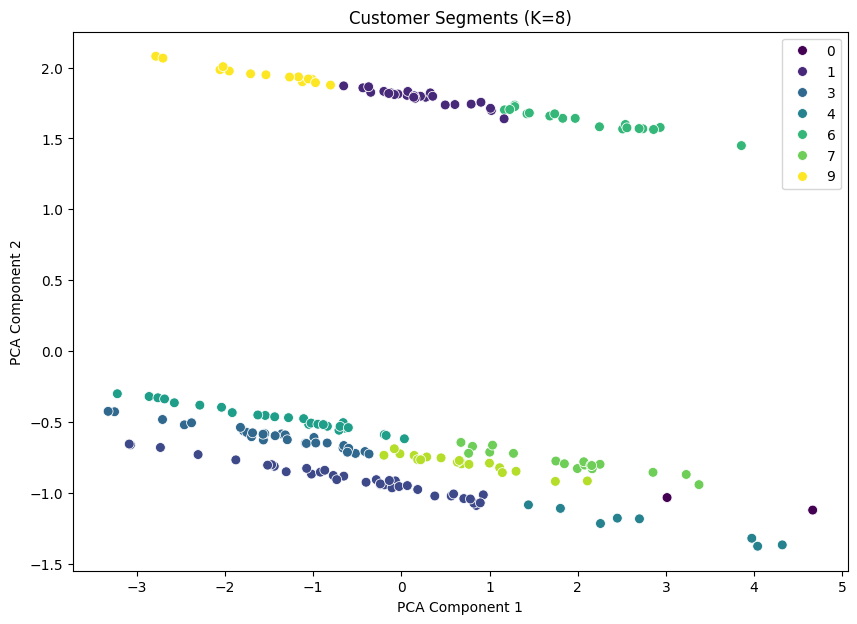

In [21]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=final_labels, palette='viridis', s=50)
plt.title(f'Customer Segments (K={k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [22]:
# Analyzing Cluster
customer_data['Cluster'] = final_labels
numeric_columns = customer_data.select_dtypes(include=[np.number]).columns
cluster_summary = customer_data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

         TotalRevenue  NumTransactions  TotalQuantity  Cluster
Cluster                                                       
0         8261.420000         9.500000      27.500000      0.0
1         3528.028400         5.200000      12.480000      1.0
2         2724.534474         4.526316      10.710526      2.0
3         2077.260345         3.586207       8.275862      3.0
4         6097.636250         9.000000      23.250000      4.0
5         2124.869231         3.192308       7.961538      5.0
6         5782.768947         7.000000      20.105263      6.0
7         5379.353889         7.500000      19.611111      7.0
8         4710.065263         5.842105      15.789474      8.0
9         1418.616000         2.733333       6.333333      9.0
